In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch

In [3]:
from fastai.conv_learner import *
from fastai.plots import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

In [4]:
from collections import defaultdict
import os
from scipy.misc import imread, imsave
import csv

In [5]:
import numpy as np
np.set_printoptions(threshold=1000)

In [6]:
Path = 'data/'

### Creating labels for the subset NIH data
* 14937 images randomly sampled from 34999 total images. These images are 3 channel images

In [7]:
nih_fname = !ls {Path}images_transform/ #NIH dataset:1,2,3,4

In [8]:
nih_fname = pd.DataFrame(np.array(nih_fname)[:,None],columns=['Image Index']) #reading. in file name of 34999 subset of images from NIH data

In [9]:
nih_labels = pd.read_csv(f'{Path}Data_Entry_2017.csv')  #labels for the full nih data

In [10]:
nih_subset_label = pd.merge(nih_labels,nih_fname,on='Image Index',how='right')

In [11]:
nih_subset_label = nih_subset_label[['Image Index','Finding Labels']]

In [12]:
nih_subset_label.columns = ['id','classes']

In [13]:
nih_subset_label['classes'] = nih_subset_label.classes.apply(lambda x: 'normal' if x == 'No Finding' else 'condition')

In [14]:
sum(nih_subset_label.classes == "normal")

8719

In [15]:
nih_subset_label.to_csv('data/nih_label_normal_condition.csv', index=False)

In [16]:
nih_subset_label.to_csv('nih_label_normal_condition.csv', index=False)

---

In [7]:
china_label_fname = !ls {Path}ChinaSet_AllFiles/ClinicalReadings/
montg_label_fname = !ls {Path}MontgomerySet/ClinicalReadings/

In [28]:
china_label = defaultdict()
montg_label = defaultdict()
for name in china_label_fname:
    f = open(f'{Path}ChinaSet_AllFiles/ClinicalReadings/{name}','r')
    china_label[name] = f.read()
    f.close()

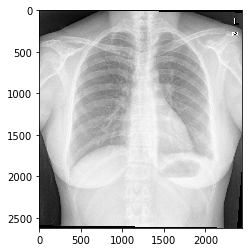

In [88]:
img1 = plt.imread('data/ChinaSet_AllFiles/CXR_png/CHNCXR_0440_1.png')

img1.shape

plt.imshow(img1)

In [69]:
img1[1000:2000,1000:2000,0]

array([[ 0.60392,  0.59608,  0.61569, ...,  0.81176,  0.8    ,  0.8    ],
       [ 0.6    ,  0.59608,  0.61961, ...,  0.81569,  0.82353,  0.82745],
       [ 0.60392,  0.60392,  0.61569, ...,  0.81176,  0.83529,  0.83922],
       ..., 
       [ 0.88627,  0.87451,  0.86667, ...,  0.93725,  0.93725,  0.93333],
       [ 0.87843,  0.87059,  0.88235, ...,  0.94902,  0.95294,  0.95294],
       [ 0.88235,  0.86667,  0.87059, ...,  0.93725,  0.94118,  0.94118]], dtype=float32)

In [70]:
img1[1000:2000,1000:2000,1]

array([[ 0.60392,  0.59608,  0.61569, ...,  0.81176,  0.8    ,  0.8    ],
       [ 0.6    ,  0.59608,  0.61961, ...,  0.81569,  0.82353,  0.82745],
       [ 0.60392,  0.60392,  0.61569, ...,  0.81176,  0.83529,  0.83922],
       ..., 
       [ 0.88627,  0.87451,  0.86667, ...,  0.93725,  0.93725,  0.93333],
       [ 0.87843,  0.87059,  0.88235, ...,  0.94902,  0.95294,  0.95294],
       [ 0.88235,  0.86667,  0.87059, ...,  0.93725,  0.94118,  0.94118]], dtype=float32)

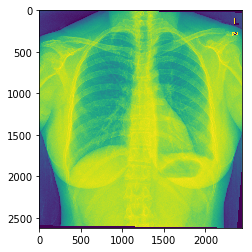

In [71]:
plt.imshow(img1[:,:,0])

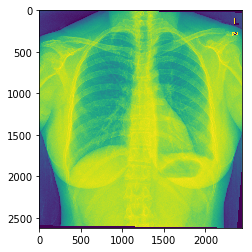

In [72]:
plt.imshow(img1[:,:,1])

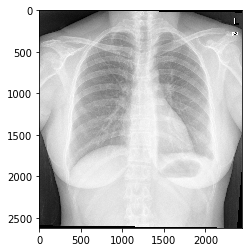

In [87]:
plt.imshow(img1[:,:,2],cmap='gray')

(array([  182405.,   319579.,   128435.,    61349.,   128258.,   482037.,   861936.,   892791.,  2054661.,
         1268249.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

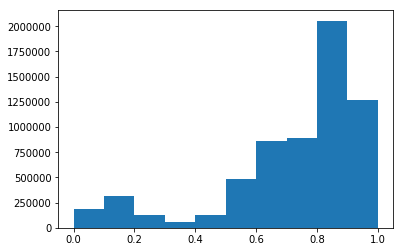

In [76]:
plt.hist(img1[:,:,0].flatten())

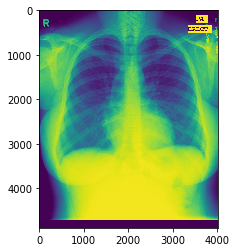

In [65]:
img = plt.imread('data/MontgomerySet/CXR_png/MCUCXR_0003_0.png')

img.shape

plt.imshow(img)

In [66]:
img.shape

(4892, 4020)

(array([ 2075669.,  1522388.,  1418947.,  1534632.,  1355565.,  1281485.,  1944223.,  2074223.,  2038775.,
         4419933.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

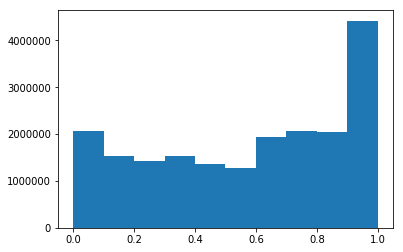

In [67]:
plt.hist(img.flatten())

In [78]:
img.shape

(4892, 4020)

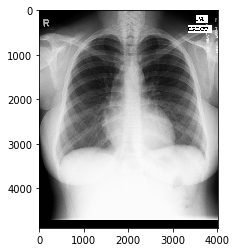

In [84]:
img = plt.imread('data/MontgomerySet/CXR_png/MCUCXR_0003_0.png')
plt.imshow(np.stack((img,img,img),-1))

## Montgomery dataset: 
**Converting single channel image into 3 channel by replicating the single channel 3 times**

### Storing the labels

In [7]:
montg_label_fname = !ls {Path}MontgomerySet/ClinicalReadings/
montg_label = defaultdict()
for name in montg_label_fname:
    f = open(f'{Path}MontgomerySet/ClinicalReadings/{name}','r')
    s = f.read().split('\n')
    c1 = s[0][15]
    c2 = s[1][15:18]
    if s[2] == 'normal':
        c3 = s[2]
    else:
        c3 = 'condition'
    montg_label[name] = [c1,c2,c3]
    f.close()


In [8]:
montg_label_list = []
for k,v in montg_label.items():
    montg_label_list.append([str(k)+','+','.join(v)])


In [11]:
with open('montgomery_labels.csv', 'w') as csvfile:
    writer = csv.writer(csvfile,delimiter=',')
    writer.writerows(montg_label_list)

In [37]:
montg_label_list1 = []
for k,v in montg_label.items():
    montg_label_list1.append([k.replace('txt','png'),v[2]])

In [39]:
with open('montgomery_labels1.csv', 'w') as csvfile:
    writer = csv.writer(csvfile,delimiter=',')
    writer.writerows(montg_label_list1)

### Converting the single channel to 3 channel image

In [12]:
montg_img_path = [] #storing the path
montg_img_f = [] #storing the filename
for path, subdirs, files in os.walk(r'data/MontgomerySet/CXR_png/'):
    for filename in files:
        if 'png' in filename:
            f = os.path.join(path, filename)
            montg_img_f.append(str(filename))
            montg_img_path.append(str(f))

In [29]:
j = sorted(montg_img_f)

In [150]:
#saving the transformed images
#this part is done
# for i,n in enumerate(montg_img_path):
#     img = plt.imread(n)
#     img_new = np.stack((img,img,img),-1)
#     imsave(f'data/MontgomerySet/montgomery_transform/{montg_img_f[i]}',img_new)

/home/ec2-user/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.


## China dataset: 

### Storing the labels

In [69]:
china_label_fname = !ls {Path}ChinaSet_AllFiles/ClinicalReadings/
china_label = defaultdict()
for name in china_label_fname:
    f = open(f'{Path}ChinaSet_AllFiles/ClinicalReadings/{name}','r')
    s = f.read().strip().split('\n')
#     if len(s)>2:
#         s = [s[0].strip(),s[2].strip()]
#     else:
#         s = s
#     c1 = s[0].split(' ')[0]
#     c2 = s[0].split(' ')[1:]
#     if s[1] == 'normal':
#         c3 = s[1]
#     else:
#         c3 = 'condition'
    china_label[name] = len(s)
    f.close()


In [70]:
china_label

defaultdict(None,
            {'CHNCXR_0001_0.txt': 2,
             'CHNCXR_0002_0.txt': 2,
             'CHNCXR_0003_0.txt': 2,
             'CHNCXR_0004_0.txt': 2,
             'CHNCXR_0005_0.txt': 2,
             'CHNCXR_0006_0.txt': 2,
             'CHNCXR_0007_0.txt': 2,
             'CHNCXR_0008_0.txt': 2,
             'CHNCXR_0009_0.txt': 2,
             'CHNCXR_0010_0.txt': 2,
             'CHNCXR_0011_0.txt': 2,
             'CHNCXR_0012_0.txt': 2,
             'CHNCXR_0013_0.txt': 2,
             'CHNCXR_0014_0.txt': 2,
             'CHNCXR_0015_0.txt': 2,
             'CHNCXR_0016_0.txt': 2,
             'CHNCXR_0017_0.txt': 2,
             'CHNCXR_0018_0.txt': 2,
             'CHNCXR_0019_0.txt': 2,
             'CHNCXR_0020_0.txt': 2,
             'CHNCXR_0021_0.txt': 2,
             'CHNCXR_0022_0.txt': 2,
             'CHNCXR_0023_0.txt': 2,
             'CHNCXR_0024_0.txt': 2,
             'CHNCXR_0025_0.txt': 2,
             'CHNCXR_0026_0.txt': 2,
             'CHNCXR

In [35]:
china_label_list = []
for k,v in china_label.items():
    china_label_list.append([str(k)+','+','.join(v)])


TypeError: sequence item 1: expected str instance, list found

In [36]:
with open('china_labels.csv', 'w') as csvfile:
    writer = csv.writer(csvfile,delimiter=',')
    writer.writerows(china_label_list)

In [40]:
china_label_list1 = []
for k,v in china_label.items():
    china_label_list1.append([k.replace('txt','png'),v[2]])

In [41]:
china_label_list1

[['CHNCXR_0001_0.png', 'normal'],
 ['CHNCXR_0002_0.png', 'normal'],
 ['CHNCXR_0003_0.png', 'normal'],
 ['CHNCXR_0004_0.png', 'normal'],
 ['CHNCXR_0005_0.png', 'normal'],
 ['CHNCXR_0006_0.png', 'normal'],
 ['CHNCXR_0007_0.png', 'normal'],
 ['CHNCXR_0008_0.png', 'normal'],
 ['CHNCXR_0009_0.png', 'normal'],
 ['CHNCXR_0010_0.png', 'normal'],
 ['CHNCXR_0011_0.png', 'normal'],
 ['CHNCXR_0012_0.png', 'normal'],
 ['CHNCXR_0013_0.png', 'normal'],
 ['CHNCXR_0014_0.png', 'normal'],
 ['CHNCXR_0015_0.png', 'normal'],
 ['CHNCXR_0016_0.png', 'normal'],
 ['CHNCXR_0017_0.png', 'normal'],
 ['CHNCXR_0018_0.png', 'normal'],
 ['CHNCXR_0019_0.png', 'normal'],
 ['CHNCXR_0020_0.png', 'normal'],
 ['CHNCXR_0021_0.png', 'normal'],
 ['CHNCXR_0022_0.png', 'normal'],
 ['CHNCXR_0023_0.png', 'normal'],
 ['CHNCXR_0024_0.png', 'normal'],
 ['CHNCXR_0025_0.png', 'normal'],
 ['CHNCXR_0026_0.png', 'normal'],
 ['CHNCXR_0027_0.png', 'normal'],
 ['CHNCXR_0028_0.png', 'normal'],
 ['CHNCXR_0029_0.png', 'normal'],
 ['CHNCXR_0030

In [60]:
with open('china_labels1.csv', 'w') as csvfile:
    writer = csv.writer(csvfile,delimiter=',')
    writer.writerows(china_label_list1)

In [64]:
with open('labels.csv', 'w') as csvfile:
    writer = csv.writer(csvfile,delimiter=',')
    writer.writerows(china_label_list1)
    writer.writerows(montg_label_list1)

## Building the first model

In [17]:
sz = 224
bs = 32
arch = resnet34

In [18]:
!ls {Path}

ChinaSet_AllFiles    images	       MontgomerySet
combined_data	     images_transform  nih_label_normal_condition.csv
Data_Entry_2017.csv  labels.csv        scraped_data


In [19]:
label_df = pd.read_csv('data/nih_label_normal_condition.csv')

In [20]:
label_df.head()

,id,classes
0,00000001_000.png,condition
1,00000001_001.png,condition
2,00000001_002.png,condition
3,00000002_000.png,normal
4,00000003_000.png,condition


In [21]:
label_df.pivot_table(index = "classes",aggfunc=len)

,id
classes,
condition,6218
normal,8719


#### Classes are almost balanced

In [22]:
n = len(list(open('data/nih_label_normal_condition.csv')))-1
val_idxs = get_cv_idxs(n,val_pct=.15)

In [23]:
len(val_idxs)

2240

In [24]:
tfms =tfms_from_model(arch,sz,aug_tfms=transforms_basic,max_zoom=1.1)
data =ImageClassifierData.from_csv(Path,'images_transform','data/nih_label_normal_condition.csv',val_idxs=val_idxs,tfms=tfms,
                                  bs=bs)

In [25]:
fn = Path+data.trn_ds.fnames[0]

In [26]:
fn

'data/images_transform/00000001_000.png'

In [27]:
img1 = plt.imread('data/images_transform/00000001_000.png')

In [28]:
img1.shape

(1024, 1024, 4)

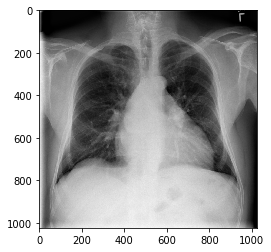

In [29]:
plt.imshow(img1)

In [30]:
img = PIL.Image.open(fn)

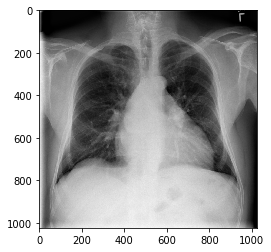

In [31]:
plt.imshow(img)

In [32]:
img.size

(1024, 1024)

In [34]:
size_d = {k: PIL.Image.open(Path+k).size for k in data.trn_ds.fnames }

In [35]:
row_sz,col_sz = list(zip(*size_d.values()))

In [36]:
row_sz = np.array(row_sz)

In [37]:
col_sz = np.array(col_sz)

(array([     0.,      0.,      0.,      0.,      0.,  12697.,      0.,      0.,      0.,      0.]),
 array([ 1023.5,  1023.6,  1023.7,  1023.8,  1023.9,  1024. ,  1024.1,  1024.2,  1024.3,  1024.4,  1024.5]),
 <a list of 10 Patch objects>)

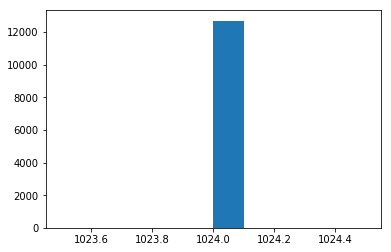

In [38]:
plt.hist(row_sz)

(array([     0.,      0.,      0.,      0.,      0.,  12697.,      0.,      0.,      0.,      0.]),
 array([ 1023.5,  1023.6,  1023.7,  1023.8,  1023.9,  1024. ,  1024.1,  1024.2,  1024.3,  1024.4,  1024.5]),
 <a list of 10 Patch objects>)

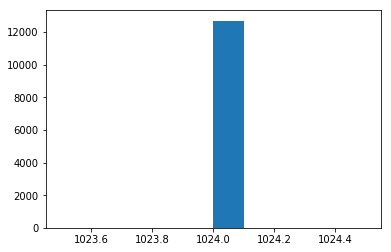

In [39]:
plt.hist(col_sz)

In [44]:
def get_data(sz,bs):
    tfms =tfms_from_model(arch,sz,aug_tfms=transforms_side_on,max_zoom=1.1)
    data =ImageClassifierData.from_csv(Path,'images_transform','data/nih_label_normal_condition.csv',val_idxs=val_idxs,tfms=tfms,
                                      bs=bs,num_workers = 4)
    return data if sz>500 else data.resize(550,'tmp')

In [45]:
data = get_data(224,32)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))


  9%|▉         | 1144/12697 [00:57<09:37, 20.00it/s]


 19%|█▉        | 2411/12697 [02:00<08:34, 19.99it/s]


 28%|██▊       | 3519/12697 [02:56<07:40, 19.94it/s]


 37%|███▋      | 4736/12697 [03:57<06:39, 19.92it/s]


 46%|████▌     | 5866/12697 [04:54<05:42, 19.94it/s]


 55%|█████▍    | 6972/12697 [05:49<04:47, 19.94it/s]


 64%|██████▍   | 8126/12697 [06:47<03:49, 19.92it/s]


 74%|███████▎  | 9354/12697 [07:50<02:48, 19.90it/s]


 82%|████████▏ | 10432/12697 [08:44<01:53, 19.89it/s]


 91%|█████████ | 11525/12697 [09:39<00:58, 19.89it/s]


100%|█████████▉| 12655/12697 [10:37<00:02, 19.86it/s]


100%|█████████▉| 12696/12697 [10:38<00:00, 19.87it/s]
                                                     
 51%|█████     | 1139/2240 [00:57<00:55, 19.82it/s]


100%|█████████▉| 2238/2240 [01:52<00:00, 19.82it/s]
                                                   

In [46]:
learn = ConvLearner.pretrained(arch,data,precompute = True)


 78%|███████▊  | 309/397 [00:56<00:16,  5.47it/s]


100%|██████████| 397/397 [01:11<00:00,  5.56it/s]

100%|██████████| 70/70 [00:12<00:00,  5.50it/s]


In [47]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


 55%|█████▍    | 218/397 [00:03<00:02, 65.78it/s, loss=0.78] 


 74%|███████▍  | 293/397 [00:03<00:01, 77.80it/s, loss=3.08]

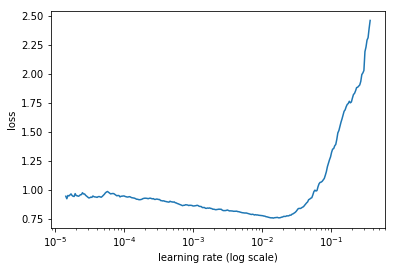

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ec2-user/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ec2-user/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [48]:
learn.sched.plot()

In [51]:
learn.fit(1e-2, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


 54%|█████▍    | 214/397 [00:03<00:02, 64.10it/s, loss=0.789]


 95%|█████████▌| 379/397 [00:04<00:00, 88.14it/s, loss=0.781]
                                                             [ 0.       0.78118  0.67449  0.625  ]

 10%|█         | 40/397 [00:02<00:21, 16.98it/s, loss=0.773]


 69%|██████▉   | 273/397 [00:03<00:01, 74.13it/s, loss=0.751]


 96%|█████████▌| 382/397 [00:04<00:00, 88.64it/s, loss=0.729]
                                                             [ 1.       0.7292   0.64548  0.63973]

 28%|██▊       | 112/397 [00:02<00:06, 41.54it/s, loss=0.74] 


 88%|████████▊ | 349/397 [00:04<00:00, 86.42it/s, loss=0.712]


 97%|█████████▋| 386/397 [00:04<00:00, 90.19it/s, loss=0.73] 
                                                            [ 2.       0.72957  0.6432   0.62768]


In [131]:
learn.save('res34_1')

In [132]:
learn.load('res34_1')

In [133]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 59%|█████▉    | 53/90 [00:00<00:00, 137.56it/s, loss=1.72] 


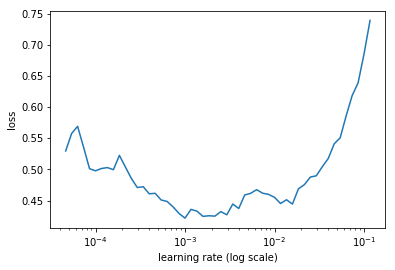

In [134]:
learn.sched.plot()

In [135]:
learn.fit(1e-4, 3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.38173  0.4032   0.8375 ]                       
[ 1.       0.38137  0.39598  0.825  ]                       
[ 2.       0.39549  0.41439  0.8375 ]                       
[ 3.       0.39226  0.4018   0.8125 ]                       
[ 4.       0.36599  0.40582  0.8375 ]                       
[ 5.       0.37747  0.40259  0.825  ]                       
[ 6.       0.36966  0.40176  0.8375 ]                       



In [136]:
learn.fit(1e-4, 3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.37927  0.40271  0.8375 ]                       
[ 1.       0.39847  0.40471  0.825  ]                       
[ 2.       0.36938  0.39778  0.8375 ]                       
[ 3.       0.38928  0.40612  0.825  ]                       
[ 4.       0.38952  0.3985   0.825  ]                       
[ 5.       0.35887  0.39482  0.8375 ]                       
[ 6.       0.36009  0.39278  0.8375 ]                       



In [137]:
learn.fit(1e-4, 3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.33692  0.40485  0.8375 ]                       
[ 1.       0.36132  0.40122  0.8375 ]                       
[ 2.       0.34413  0.39746  0.8375 ]                       
[ 3.       0.39323  0.39376  0.8375 ]                       
[ 4.       0.374    0.39165  0.8375 ]                       
[ 5.       0.37838  0.39586  0.825  ]                       
[ 6.       0.39941  0.39573  0.8375 ]                       



In [138]:
learn.fit(1e-3, 3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.38598  0.40576  0.8125 ]                       
[ 1.       0.37526  0.40224  0.8125 ]                       
[ 2.       0.3753   0.39769  0.825  ]                       
[ 3.       0.37912  0.38589  0.85   ]                       
[ 4.       0.39276  0.38575  0.85   ]                       
[ 5.       0.37796  0.37456  0.8625 ]                       
[ 6.       0.37297  0.38795  0.8375 ]                       



In [139]:
learn.fit(1e-3, 3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.33061  0.38326  0.825  ]                       
[ 1.       0.37632  0.3894   0.8125 ]                       
[ 2.       0.34851  0.37794  0.8375 ]                       
[ 3.       0.37011  0.38599  0.8125 ]                       
[ 4.       0.35257  0.37297  0.8625 ]                       
[ 5.       0.34741  0.38101  0.825  ]                       
[ 6.       0.32773  0.36909  0.8375 ]                       



In [140]:
learn.save('res34_2')

In [164]:
learn.load('res34_2')

In [165]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 59%|█████▉    | 53/90 [00:00<00:00, 150.01it/s, loss=0.446]


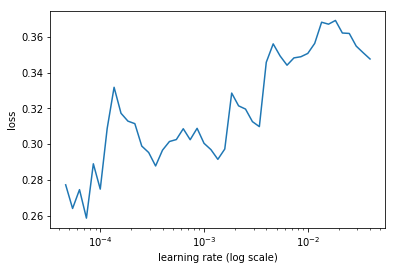

In [167]:
learn.sched.plot()

In [168]:
learn.fit(1e-4,3,cycle_len=1,cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

[ 0.       0.28189  0.36397  0.85   ]                       
[ 1.       0.35331  0.37697  0.8375 ]                       
[ 2.       0.36032  0.39223  0.8375 ]                       
[ 3.       0.3712   0.35784  0.85   ]                       
[ 4.       0.37396  0.36016  0.85   ]                       
[ 5.       0.32442  0.36729  0.85   ]                       
[ 6.       0.31252  0.37011  0.8375 ]                       
[ 7.       0.32921  0.34435  0.8375 ]                       
[ 8.       0.3662   0.35903  0.85   ]                       
[ 9.       0.38418  0.36033  0.85   ]                       
[ 10.        0.33551   0.35507   0.8625 ]                   
[ 11.        0.32174   0.37572   0.8375 ]                   
[ 12.        0.31609   0.34496   0.85   ]                   



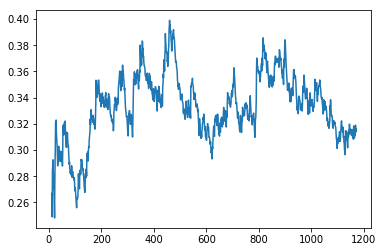

In [169]:
learn.sched.plot_loss()

In [170]:
learn.save('res34_3')

In [227]:
learn.load('res34_3')

In [172]:
data = get_data(299,8)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [173]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 62%|██████▏   | 56/90 [00:00<00:00, 174.00it/s, loss=0.422]


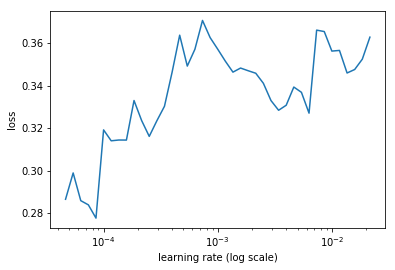

In [174]:
learn.sched.plot()

In [175]:
learn.fit(1e-3,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.33739  0.36336  0.85   ]                       
[ 1.       0.30624  0.36965  0.8625 ]                       
[ 2.       0.34772  0.37955  0.85   ]                       
[ 3.       0.34184  0.36899  0.8375 ]                       
[ 4.       0.32257  0.404    0.875  ]                       
[ 5.       0.34946  0.35991  0.875  ]                       
[ 6.       0.32001  0.36183  0.8625 ]                       



In [176]:
learn.fit(1e-4,3,cycle_len=1,cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.32171  0.37541  0.8625 ]                       
[ 1.       0.30029  0.36823  0.8625 ]                       
[ 2.       0.32188  0.38741  0.875  ]                       
[ 3.       0.32715  0.36157  0.8625 ]                       
[ 4.       0.2853   0.36291  0.875  ]                       
[ 5.       0.31245  0.36169  0.8625 ]                       
[ 6.       0.29813  0.36906  0.875  ]                       



In [177]:
learn.save('res34_4')

In [47]:
learn.load('res34_4')

In [48]:
log_preds,y = learn.TTA()

In [55]:
accuracy(log_preds,y)

0.875

In [50]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

In [51]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [52]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [53]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most incorrect conditions


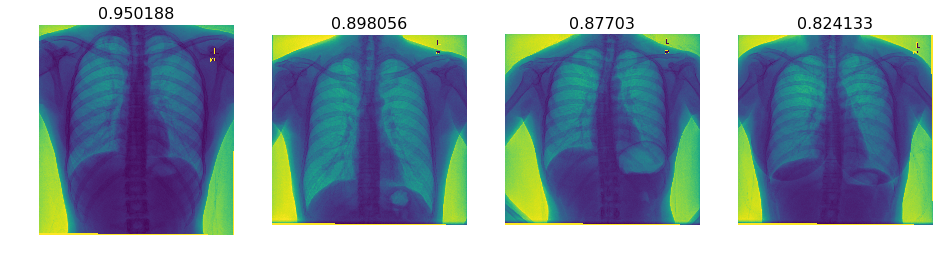

In [54]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect conditions")

Correctly classified


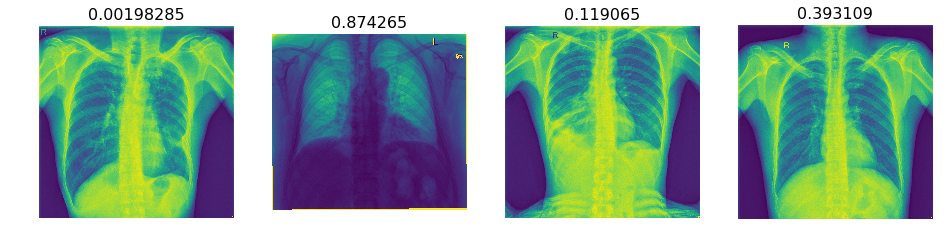

In [42]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


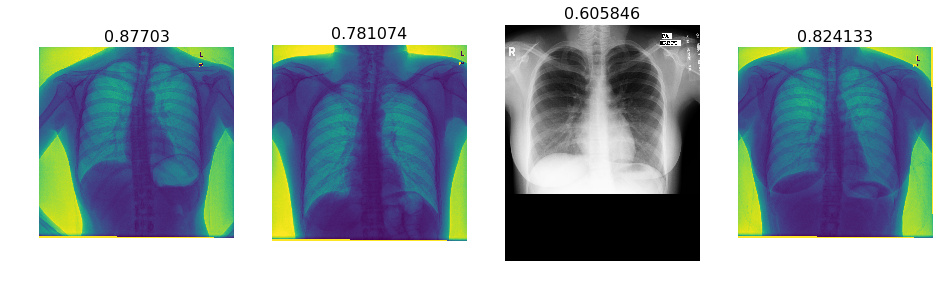

In [43]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[37  7]
 [ 3 33]]


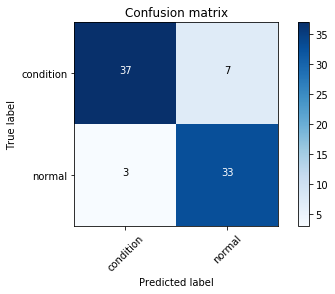

In [56]:
plot_confusion_matrix(cm, data.classes)

----